# Regressionsanalys med kurvlinjära (kvadratiska) effekter

English version | [Startsida](../index.html)

Normalt när vi gör [regressionsanalyser](regression1_sv.html) jobbar vi med linjära effekter. Det vill säga, vi passar en rak linje till en mängd punkter. Vi utgår därmed från att alla undersökta samband också är raka. En ökning i den oberoende variabeln leder alltid till en ökning *eller* minskning i den beroende variabeln.

I verkligheten finns det dock många samband som inte är linjära. En ökning av något kan leda till en ökning av något annat, men kanske bara upp till en viss gräns. Ett trivialt exempel är sambandet mellan lycka och glassätning. Om man äter en glass blir man gladare. Äter man två glassar blir man antagligen också gladare, men den andra glassen ger inte lika mycket lycka som den första. Och om man äter tre glassar är det mycket möjligt att man blir mindre lycklig än om man inte hade ätit någon glass alls!

Likaså sägs det ofta att pengar inte kan köpa lycka - i alla fall inte när man kommit tillräckligt högt upp på inkomstskalan. När man väl har finansiell trygghet är det kanske annat som behövs för att skapa lycka. Ett annat exempel på ickelinjära samband är mellan valdeltagande och ålder - medelålders röstar oftare än unga vuxna, men valdeltagandet är något lägre bland de riktigt gamla.

**Vi kan dock lätt undersöka sådana samband med vanlig regressionsanalys, genom att behandla våra oberoende variabler på ett särskilt sätt.** Lösningen är att använda sig av så kallade kvadratiska termer. Vi "kvadrerar" vår oberoende variabel, vilket betyder att vi multiplicerar den med sig själv. Det betecknas genom att man skriver en upphöjd 2 efter variabeln, såhär: $variabel^2$.
Därefter lägger vi in både den vanliga variabeln och den kvadrerade varianten i regressionsanalysen. Genom att tolka de två koefficienterna tillsammans kan vi beskriva ett samband som böjer sig en gång. Det blir en kurva (Man kan också göra modeller där man har två eller fler svängar. Teorier som beskriver sådana samband är dock mycket mer sällsynta och komplicerade, så vi håller oss här till en sväng).

Förklaringen är att den kvadrerade variabeln växer mycket snabbare än den vanliga variabeln. V kan till exempel ta ålder som ett exempel. I tabellen nedan visas vad kvadraten av ålder blir vid olika värden av ålder.

| $Ålder$ | $Ålder^2$ |
|-------|-----------------|
| 0     | 0               |
| 1     | 1               |
| 2     | 4               |
| 3     | 9               |
| 4     | 16              |
| 5     | 25              |

Den vanliga åldersvariabeln ökar med ett steg per rad, men den kvadrerade ökar först med 1, sen med 3, sen med 5, sen med 7, sen med 9. Den sticker iväg.

I regressionsanalysen kommer koefficienten för den vanliga åldersvariabeln oftast vara större än den för ålder i kvadrat. Men i takt med att den kvadrerade variabeln blir mycket större blir den koefficienten mycket viktigare. Om den vanliga koefficienten är positiv, och den kvadrerade negativ, kan vi då få en situation där koefficienten för den kvadrerade variabeln efter hand tar ut den vanliga. Det gör att kurvan vänder neråt.

## Kan pengar köpa lycka?

Kanske är det lite svårt att greppa. Men förhoppningsvis klarnar det med ett exempel. Vi ska använda amerikansk enkätdata för att undersöka sambandet mellan inkomst och lycka, som nämndes tidigare. Vi börjar med att ladda in data från [General Social Survey](https://gss.norc.org/get-the-data/stata), insamlad 2016. 

In [31]:
use "/Users/xsunde/Dropbox/Jupyter/stathelp/data/GSS2016.dta", clear

Vi ska använda oss av variabeln "happy", som är en fråga där respondenten får ange om den är "Very happy" (1), "Pretty happy" (2) eller "Not too happy" (3). För att göra det lite mer lättolkat gör vi en ny variabel ("happy_new") som bygger på samma information, men där "Very happy" är kodat som 3 och "Not too happy" som 1. Vi gör det med kommandot [`generate`](recodings_sv.html), och tar 4 minus värdet på variabeln "happy". De som tidigare hade värdet 3 (not too happy) får nu värdet 4-3 = 1, och så vidare.

In [34]:
gen happy_new = 4 - happy

(8 missing values generated)


För att mäta inkomst har vi en variabel som heter "realinc", där respondentens hushållsinkomst per år anges i dollar. Det lägsta värdet i datan är 234, och det högsta 131677. Stora skillnader alltså. För att det ska bli lättare att tolka resultaten delar vi variabeln med 10000, så att den mäter årsinkomst i tiotusentals dollar.

In [36]:
gen inc_10000 = realinc/10000

(271 missing values generated)


## Vanlig regressionsanalys
Vi börjar med att göra en vanlig regressionsanalys på sambandet. Vi sätter "happy_new" som beroende variabel, och "inc_10000" som oberoende.

In [37]:
reg happy_new inc_10000


      Source |       SS           df       MS      Number of obs   =     2,591
-------------+----------------------------------   F(1, 2589)      =    129.39
       Model |  51.3696466         1  51.3696466   Prob > F        =    0.0000
    Residual |  1027.85459     2,589   .39700834   R-squared       =    0.0476
-------------+----------------------------------   Adj R-squared   =    0.0472
       Total |  1079.22424     2,590  .416688895   Root MSE        =    .63009

------------------------------------------------------------------------------
   happy_new |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   inc_10000 |   .0446972   .0039294    11.38   0.000     .0369921    .0524023
       _cons |   1.981089   .0178246   111.14   0.000     1.946137    2.016041
------------------------------------------------------------------------------


Vi kan se att det finns ett positivt samband - de som tjänar mer är lyckligare. För varje 10000 dollar ytterligare personens hushåll tjänar ökar lyckan med 0,04 på vår lilla lyckoskala. Sambandet är statistiskt signifikant, men förklarar inte jättemycket av variationen i lycka - $R^2$-värdet är knappt fem procent.

Vi ser också att konstanten - det vill säga den förväntade lyckan för folk med 0 inkomst - är 1,98, alltså nästan precis på "Pretty happy".

## Regressionsanalys med kvadratisk term

Nu ska vi se om det är så att pengar slutar att vara bra för lyckan vid någon viss nivå, eller om mer pengar alltid är att föredra. Vi tar då först och skapar en ny variabel, som är inkomst gånger inkomst, alltså `inc_10000 * inc_10000`.

In [38]:
gen inc_10000_sq = inc_10000 * inc_10000

(271 missing values generated)


Vi döper den till samma sak, fast med "sq" på slutet, för att visa att den är kvadrerad (squared på engelska).

**Nu lägger vi in både den nya variabeln OCH den gamla i regressionsanalysen. Att ha med båda är helt nödvändigt. Om vi bara lägger in den kvadrerade blir det helt fel.**

In [39]:
reg happy_new inc_10000 inc_10000_sq


      Source |       SS           df       MS      Number of obs   =     2,591
-------------+----------------------------------   F(2, 2588)      =    107.47
       Model |  82.7623282         2  41.3811641   Prob > F        =    0.0000
    Residual |   996.46191     2,588   .38503165   R-squared       =    0.0767
-------------+----------------------------------   Adj R-squared   =    0.0760
       Total |  1079.22424     2,590  .416688895   Root MSE        =    .62051

------------------------------------------------------------------------------
   happy_new |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   inc_10000 |   .1466397   .0119347    12.29   0.000     .1232373    .1700422
inc_10000_sq |  -.0081405   .0009015    -9.03   0.000    -.0099083   -.0063727
       _cons |   1.815863   .0253567    71.61   0.000     1.766141    1.865584
--------------------------------------------------

Blev analysen bättre? Ett sätt att avgöra det är att titta på den förklarade variansen, $R^2$. I den förra analysen var det värdet 0,0476. Nu har det stigit till 0,0767. Fortfarande inte jättehögt, men en klar förbättring. Vår "modell" beskriver nu datan lite bättre.

Vi kan också titta på koefficienternas signifikans. Om den kvadratiska termens koefficient är signifikant indikerar det att vi tillför något genom att lägga in den (här gör det inget om den vanliga termen är insignifikant).

## Tolkning

Vad är det då vi ser? Vi kan tolka koefficienterna i ordning. Koefficienten på den vanliga variabeln är positiv. Det betyder att effekten av att öka sin inkomst först är positiv. Ju mer pengar, desto gladare blir man.

Koefficienten på den kvadrerade variabeln är negativ. Det betyder att den positiva effekten av pengar kommer minska med tiden - kanske blir den till och med negativ någonstans på skalan. Precis som man kunde ana!

Koefficienten för den kvadrerade variabeln är alltså vad som händer sen, längre upp på skalan. Den har inte alltid motsatt tecken som den vanliga variabeln. Hade den varit positiv hade det i det här fallet betytt att man blir gladare och gladare ju mer pengar man får. Effekten blir större och större.

Har man två negativa koefficienter betyder det på motsvarande sätt att man har en negativ effekt, som blir mer och mer negativ längre upp på skalan.

## Räkna ut hur lycklig en person är

Hur lyckliga är personer med olika inkomst? Regressionsekvationen för att gissa vad en persons lyckonivå blir som följer:<br>
happy_new = 1,815863 + 0,1466397 * inc_10000 -0,0081405 * inc_10000_sq

Det är alltså interceptet plus koefficienterna för variablerna, gånger variabelvärdena. En person vars hushåll tjänar 10000 dollar får värdet 1 på variabeln "inc_10000", och också värdet 1 på variabeln "inc_10000_sq", eftersom 1 gånger 1 fortfarande är 1. Om vi ska gissa hur lycklig den personen är blir det

happy_new = 1,815863 + 0,1466397 * 1 - 0,0081405 * 1

Vilket ger värdet 1,95.

En person vars hushåll tjänar 100000 dollar om året har istället värdet 10 på inc_10000, och värdet 100 på variabeln inc_10000_sq. Ekvationen blir då:

happy_new = 1,815863 + 0,1466397 * 10 - 0,0081405 * 100

Vilket ger värdet 2,47. Den som tjänar mer är alltså gladare.

## Räkna ut vändpunkten ##
Men hur mycket pengar är tillräckligt? Det är lite mer komplicerat att räkna ut (men inte jättekomplicerat). **Den som inte är intresserad av att veta exakt kan hoppa över detta avsnitt. Det går att se ungefärligt med hjälp av grafer.**

Vi får fram vändpunkten genom att räkna ut [*derivatan*](https://sv.wikipedia.org/wiki/Derivata) på vår regressionsfunktion. Derivatan är ett ord för lutningen på linjen vid en viss punkt. För en rät linje är derivatan samma över hela linjen; lutningen är densamma hela tiden.

För vår böjda funktion blir derivatan annorlunda. Kurvan kommer luta brant uppåt i början, och sen bli plattare och plattare, och sedan kanske till och med vända nedåt. Det betyder att derivatan först är hög, och sedan blir lägre och lägre.

Funktionen vi vill ta derivatan av är följande:

happy_new = 1,815863 + 0,1466397 * inc_10000 - 0,0081405 * inc_10000_sq

Jag tänker här inte gå in i detalj på principen för hur man tar derivatan av ett uttryck ([men kolla gärna in denna sida för den generella principen)](https://eddler.se/lektioner/deriveringsregler-potensfunktioner/), utan bara ge en mall att följa för kvadratiska funktioner av den här typen.

1. Först tar vi bort alla delar som inte innehåller variabeln vi är intresserade av, alltså inc_10000. I det här fallet innebär det att vi tar bort konstanten.
2. Koefficienten för den vanliga variabeln låter vi vara som den är, men vi tar bort själva variabeln inc_10000.
3. Koefficienten för den kvadrerade variabeln multiplicerar vi med två, och så byter vi ut inc_10000_sq mot den vanliga inc_10000.

Ekvationen för att räkna ut derivatan blir alltså:

derivatan av inc_10000 = 0,1466397 - 0,016281 * inc_10000

Derivatan är lutningen på kurvan vid varje punkt. Vi kan tolka det som effekten av ytterligare pengar, vid just den punkter. Vad är till exempel lutningen när man tjänar 10000 dollar om året, och inc_10000 är 1? Lutningen är 0,146639 - 0,0081405 * 1 = 0,1384985.

**Nu sätter vi derivatan till noll**, och löser ekvationen för att se vid vilket värde av inc_10000 som derivatan är noll, alltså den punkt där effekten av pengar slutar att vara positiv. Det här är högstadiematte, och målet är att få inc_10000 ensamt på ena sidan.

0 = 0,1466397 - 0,016281 * inc_10000

Först lägger vi till 0,016281 * inc_10000 på båda sidor:

0,016281 * inc_10000 = 0,1466397

Därefter dividerar vi båda sidor med 0,016281:

inc_10000 = 9,0068

Voila! Först när inc_10000 är 9 - alltså när hushållet tjänar 90000 dollar om året - slutar pengar att vara positivt för lyckan. Pengar kan alltså köpa en hel del lycka.

## Visa kurvlinjära samband i grafer

Det enklaste sättet att förstå kurvlinjära samband är dock genom grafer. I det här fallet är scatterplots dock inte särskilt informativa, eftersom det bara finns tre värden på den beroende variabeln. Vi kan därför börja med att göra en graf som drar en linje som försöker passa sig så bra som möjligt till punkterna, och kan svänga nästan hur som helst. Funktionen kallas "local polynomial smoothing". Vi gör det med hjälp av `twoway`-kommandot. I en parentes skriver vi `lpoly` följt av variabeln vi vill ha på y-axeln, och därefter variabeln vi vill ha på x-axeln:

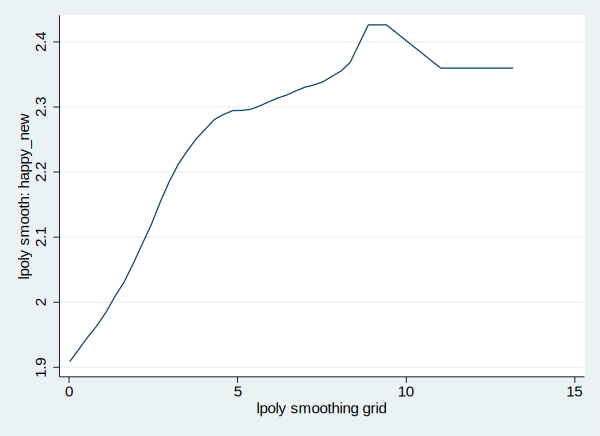

In [48]:
twoway (lpoly happy_new inc_10000)

Här har vi mönstret i datan som vi vill beskriva. Vi ser återigen att när vi går till höger (inkomsterna ökar) så ökar också lyckan (högre värden på y-axeln). Men det verkar också plana ut.

Nu lägger vi till den räta regressionslinjen i en egen parentes, med kommandot `lfit`. 

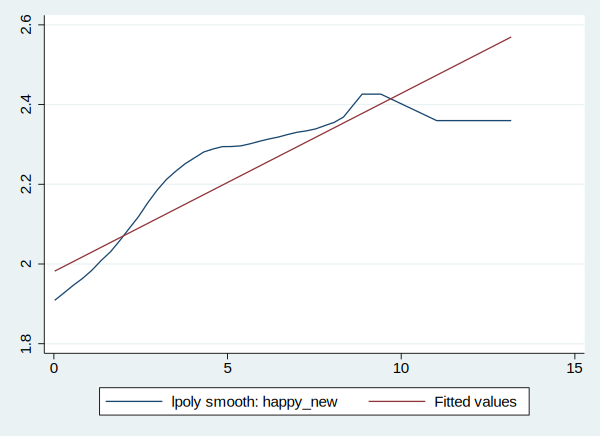

In [49]:
twoway (lpoly happy_new inc_10000) (lfit happy_new inc_10000)

Det vi nu ser motsvarar den första regressionstabellen, där bara inc_10000 var inkluderat. Det är ett mycket tydligt samband. Men vi ser också att vår röda regressionslinje fortsätter uppåt i all evighet, och att den därför överskattar lyckan hos de allra rikaste, jämfört med den blåa linjen, som utgör "facit". Därför provar vi att lägga till en kvadratisk, böjd, linje med kommandot `qfit`.

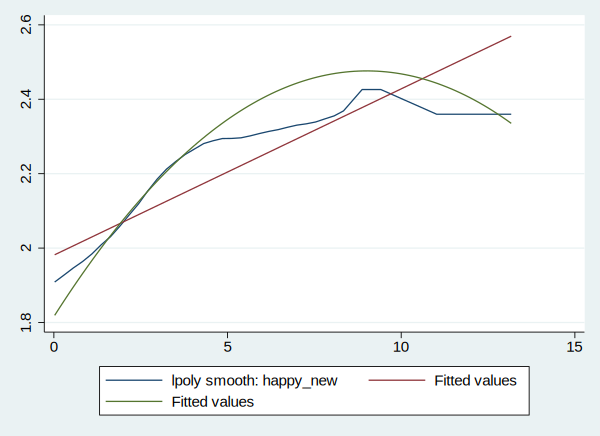

In [50]:
twoway (lpoly happy_new inc_10000) (lfit happy_new inc_10000) (qfit happy_new inc_10000)

Den gröna linjen motsvarar nu det vi såg i den andra regressionsanalysen. Den gröna linjen visar våra gissningar för hur lycklig en person är, beroende på dennes inkomst. Överlag ligger den gröna linjen närmare den blåa än vad den röda gör, vilket förklarar varför $R^2$ är högre. Vi ser också att den först går uppåt, och sedan neråt, vilket viju listat ut sedan tidigare. Och slutligen ser vi att vändningen kommer vid 9, som vi räknade ut i avsnittet ovan.

Samtidigt är den gröna linjen inte heller den en perfekt beskrivning av verkligheten. Om man bara tittar på den gröna linjen ser det som sagt ut som att effekten av mer pengar är negativ vid riktigt höga värden. Men om vi bortser från den lilla knölen kring 9 så ser det snarare ut som att det som egentligen händer är att linjen planar ut.

## Avslutning
Här har jag inte tagit med några kontrollvariabler, men man behöver inte göra på något annat sätt än i en vanlig regressionsanalys. De behöver inte kvadreras bara för att en annan variabel är kvadrerad. Man tar bara med dem tillsammans.

Alla modeller som föreskriver någon sorts förutsägbarhet - en rak linje, en linje med en sväng - innebär en förenkling av verkligheten. Med mer avancerade modeller kan vi bättre beskriva vår data. Samtidigt gäller det att komma ihåg att målet inte är att göra en karta 1:1, utan att förenkla så att vi lättare kan tala om generella mönster. Men utan att förenkla för mycket, så att vi missar viktiga slutsatser.

Vart gränsen går är inte helt lätt att avgöra. Därför är det viktigt att tänka, helst före man gör sina analyser. Om man har en teori som föreskriver någon form av avtagande eller tilltagande effekt kan kvadratiska termer vara ett bra sätt att testa de teorierna med hjälp av regressionsanalys.